# Misión
- Utilizar visualizaciones para “contar una historia”. 
- Mostrar qué países tienen una mayor proporción y cómo ha evolucionado en los últimos años. 
- ¿Cómo se comparan las diferentes regiones del mundo? ¿Cómo está la situación en Guatemala, comparada al mundo? ¿Y comparada América Latina
# Teoría:
- Principios del diseño de visualización: simplicidad, claridad, precisión y eficiencia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from constants.countries import LATAM_COUNTRIES, ALL_COUNTRIES, AFRICA, ASIA, OCEANIA, EUROPE, NORTH_AMERICA, SOUTH_AMERICA

data = pd.read_csv("./data/Food Share Emissions.csv")

In [2]:
import pandas as pd

# Asegurarse de que todos los valores de emisiones son no negativos
df_filtered = data[data["Food's share of total emissions (incl. LULUFC)"] >= 0]

# Agrupar por 'Entity' y sumar las emisiones, luego resetear el índice para tener 'Entity' como una columna
df_grouped = df_filtered.groupby('Entity')["Food's share of total emissions (incl. LULUFC)"].sum().reset_index()

# Ordenar por emisiones totales para encontrar los países con mayores emisiones
df_grouped_sorted = df_grouped.sort_values(by="Food's share of total emissions (incl. LULUFC)", ascending=False)

# Obtener los top países con mayores emisiones históricas
top_countries_historical_emissions = df_grouped_sorted.head(15)  # Ajusta el número según cuántos quieras listar


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stacked_area_chart(data, year_column, emissions_column, title, xlabel, ylabel, countries = []):
    
    filtered_data = data[data['Entity'].isin(countries)] if countries else data
    data_pivot = filtered_data.pivot(index=year_column, columns='Entity', values=emissions_column)
    
    plt.figure(figsize=(12, 8))
    plt.stackplot(data_pivot.index, data_pivot.fillna(0).T, labels=data_pivot.columns)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def create_boxplot_and_linegraph(data, country_name, year_column, emissions_column):
    # Filter the data for the selected country
    country_data = data[data['Entity'] == country_name]

    # Start a subplot of 2 rows and 1 column
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    
    # Box plot
    sns.boxplot(x=year_column, y=emissions_column, data=country_data, ax=axes[0])
    axes[0].set_title(f'Box Plot of Emissions for {country_name}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel(emissions_column)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    # Line graph
    sns.lineplot(x=year_column, y=emissions_column, data=country_data, ax=axes[1], marker='o')
    axes[1].set_title(f'Line Graph of Emissions for {country_name}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel(emissions_column)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()
    


In [4]:
countries = list[data["Entity"].unique()]
print(countries)



list[array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', '

#### Primero vamos a ver cuales son los países con mayor emisión histórico

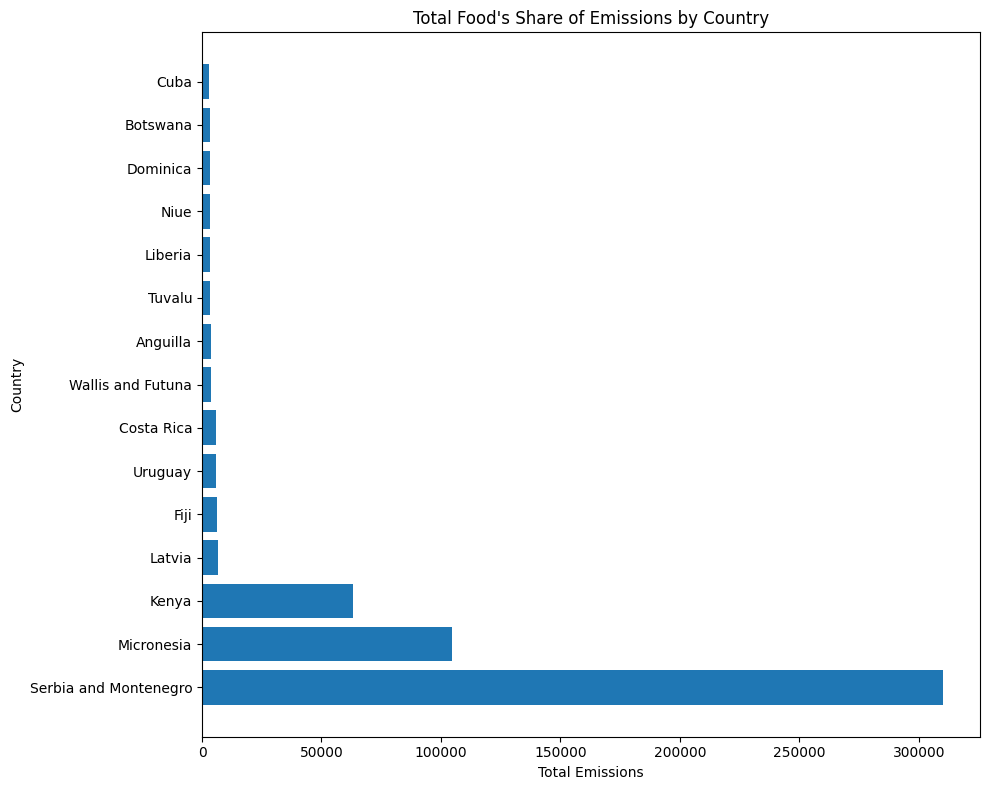

In [5]:
# Crear el histograma
plt.figure(figsize=(10, 8))  # Cambia el tamaño según sea necesario
plt.barh(top_countries_historical_emissions['Entity'], top_countries_historical_emissions["Food's share of total emissions (incl. LULUFC)"])

plt.xlabel("Total Emissions")  # Etiqueta del eje X
plt.ylabel("Country")  # Etiqueta del eje Y
plt.title("Total Food's Share of Emissions by Country")  # Título del gráfico
plt.tight_layout()  # Ajustar automáticamente los parámetros para que encajen bien en el área de la figura

# Mostrar el gráfico
plt.show()


##### Observamos que Serbia y Montenegro, Micronesia y Kenya poseen la mayor emisión histórica, por lo que vamos a analizar qué ocurre por año

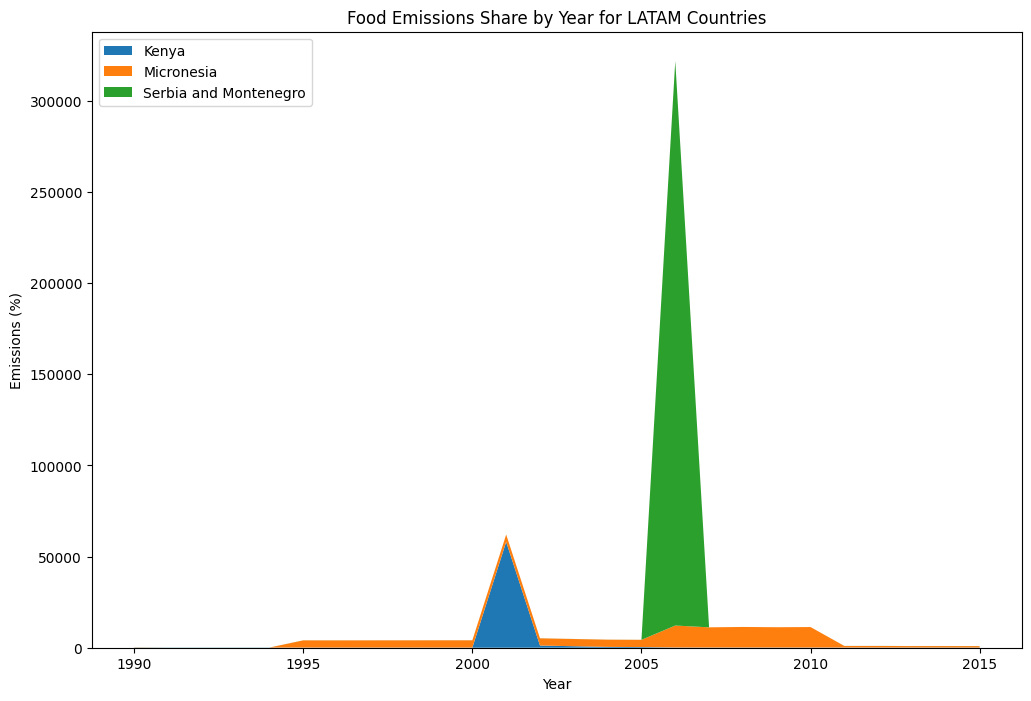

In [6]:
plot_stacked_area_chart(df_filtered, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', ['Serbia and Montenegro', 'Micronesia', 'Kenya'])

##### Como podemos ver no parece que la información sea correcta con kenya y Serbia y Montenegro. En el caso de Micronesia los datos siempre se registran por lo que creemos que es un caso especial

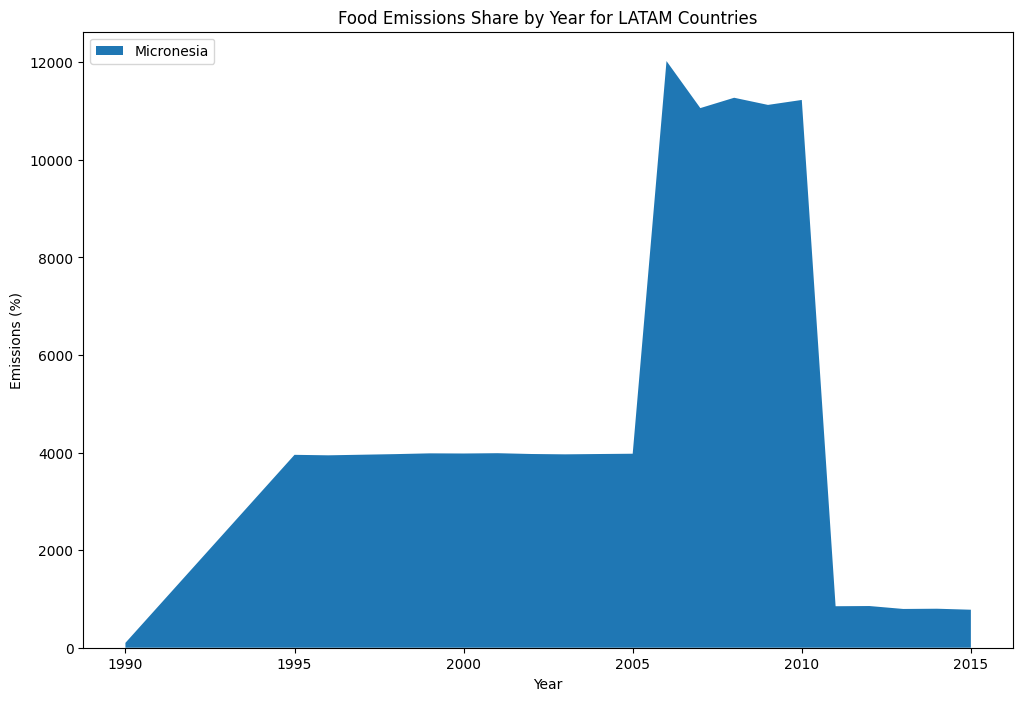

In [7]:
plot_stacked_area_chart(df_filtered, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', ['Micronesia'])

##### Por otro lado, observamos Anguilla, Fiji, Latvia y Niue mo muestra datos estables por lo que puede ser que hayan problemas con la recaudación de datos

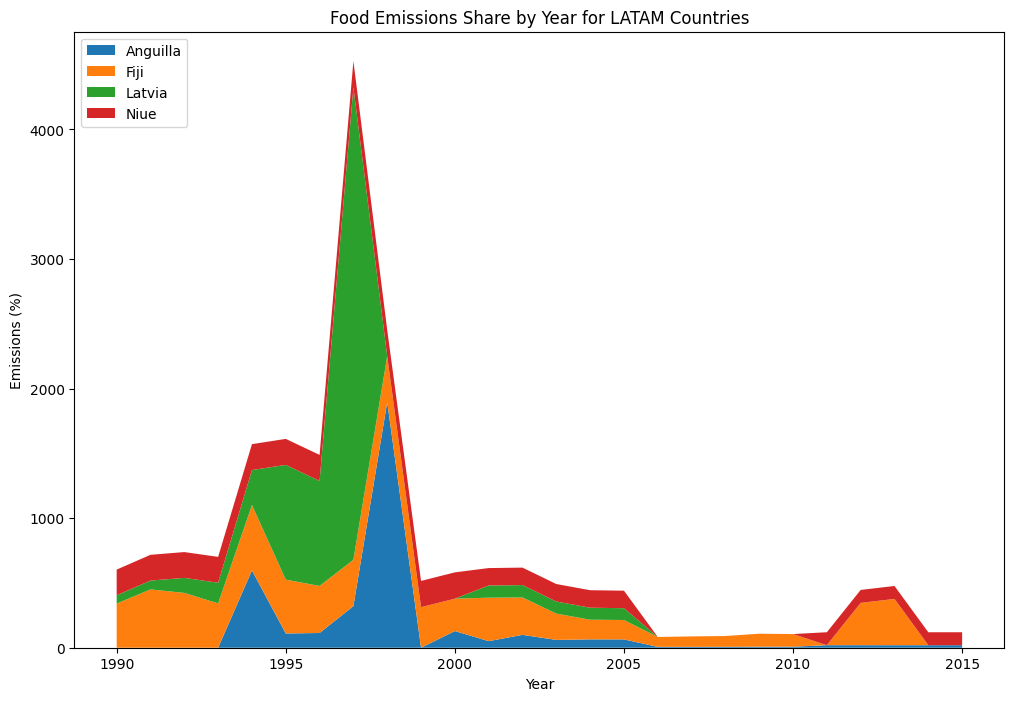

In [8]:
plot_stacked_area_chart(df_filtered, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', ['Latvia', 'Anguilla', 'Niue', 'Fiji'])

##### Ahora, extrayendo los datos anteriormente mencionados, obtenemos los siguientes 10 países con mayor emisión

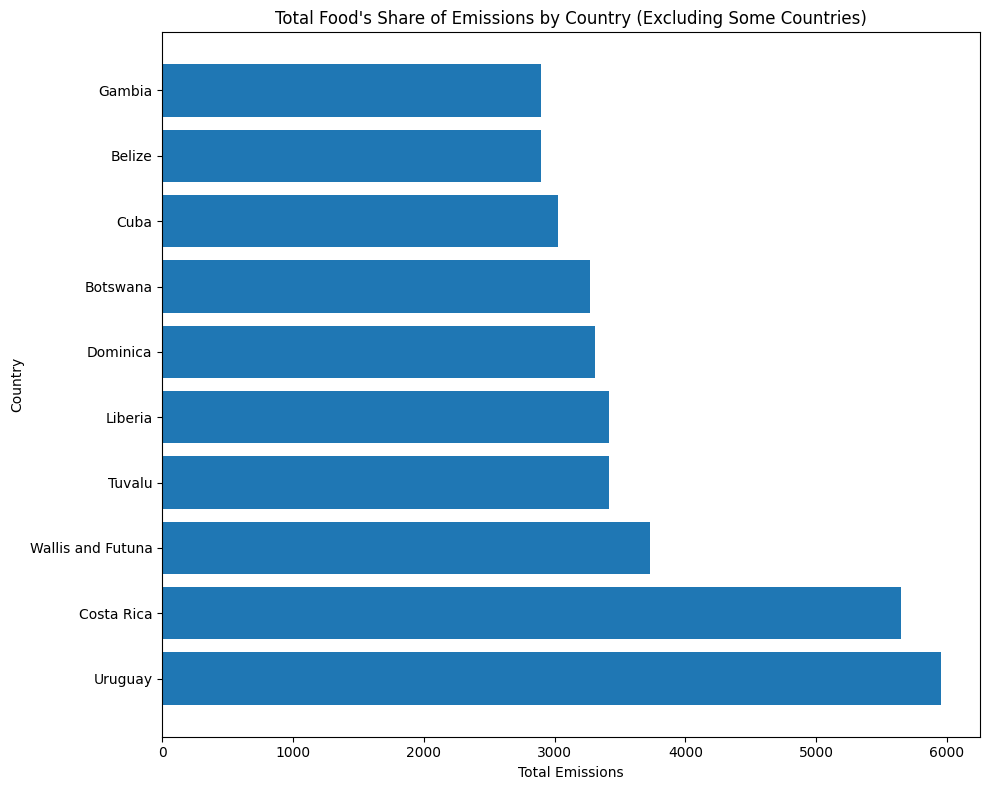

In [9]:
# Lista de países a excluir
exclude_countries = ['Micronesia', 'Serbia and Montenegro', 'Kenya', 'Latvia', 'Anguilla', 'Niue', 'Fiji']  # Reemplaza con los nombres reales de los países

# Filtrar el DataFrame para excluir los países listados en exclude_countries
filtered_countries = df_grouped_sorted[~df_grouped_sorted['Entity'].isin(exclude_countries)]

# Obtener los top países con mayores emisiones históricas
filtered_countries = filtered_countries.head(10)  # Ajusta el número según cuántos quieras listar

# Ahora, crea el histograma con el DataFrame filtrado
plt.figure(figsize=(10, 8))  # Cambia el tamaño según sea necesario
plt.barh(filtered_countries['Entity'], filtered_countries["Food's share of total emissions (incl. LULUFC)"])

plt.xlabel("Total Emissions")  # Etiqueta del eje X
plt.ylabel("Country")  # Etiqueta del eje Y
plt.title("Total Food's Share of Emissions by Country (Excluding Some Countries)")  # Título del gráfico
plt.tight_layout()  # Ajustar automáticamente los parámetros para que encajen bien en el área de la figura

# Mostrar el gráfico
plt.show()


##### Para poder observar mejor el comportamiento de la información podemos analizar la emisión en función del tiempo

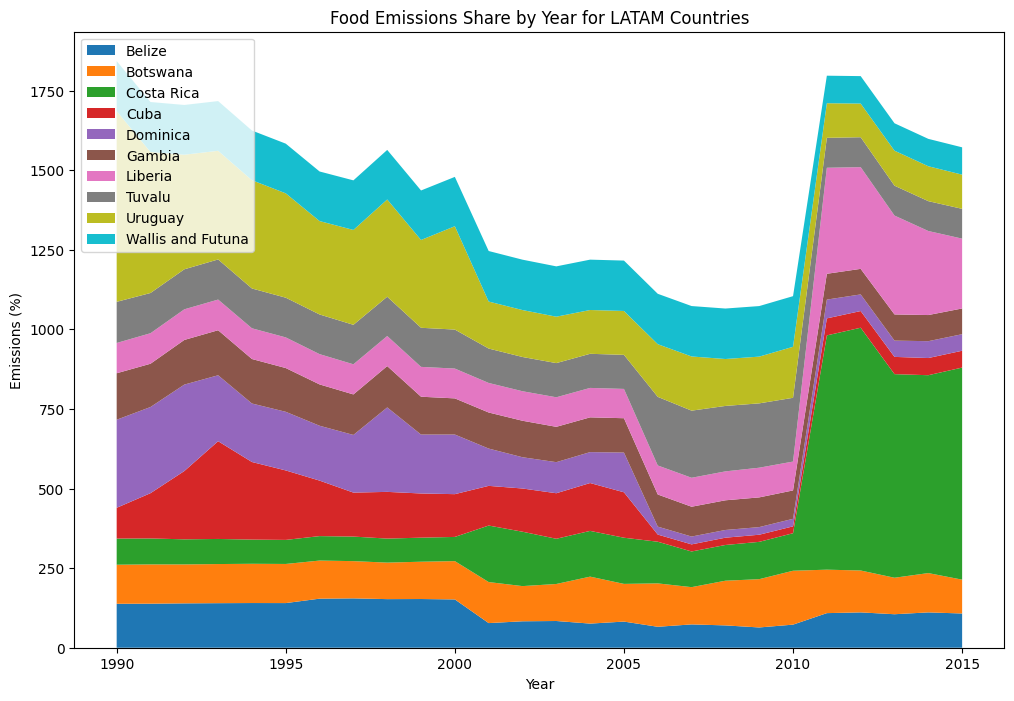

In [10]:
plot_stacked_area_chart(df_filtered, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', ['Uruguay', 'Costa Rica', 'Wallis and Futuna', 'Tuvalu', 'Liberia', 'Dominica', 'Botswana', 'Cuba', 'Belize', 'Gambia'])

##### Como se puede observar, en general, los países muestran una disminusión de las emisiones en el tiempo, a excepción de Costa Rica cuyas emisiones aumentan en gran medida

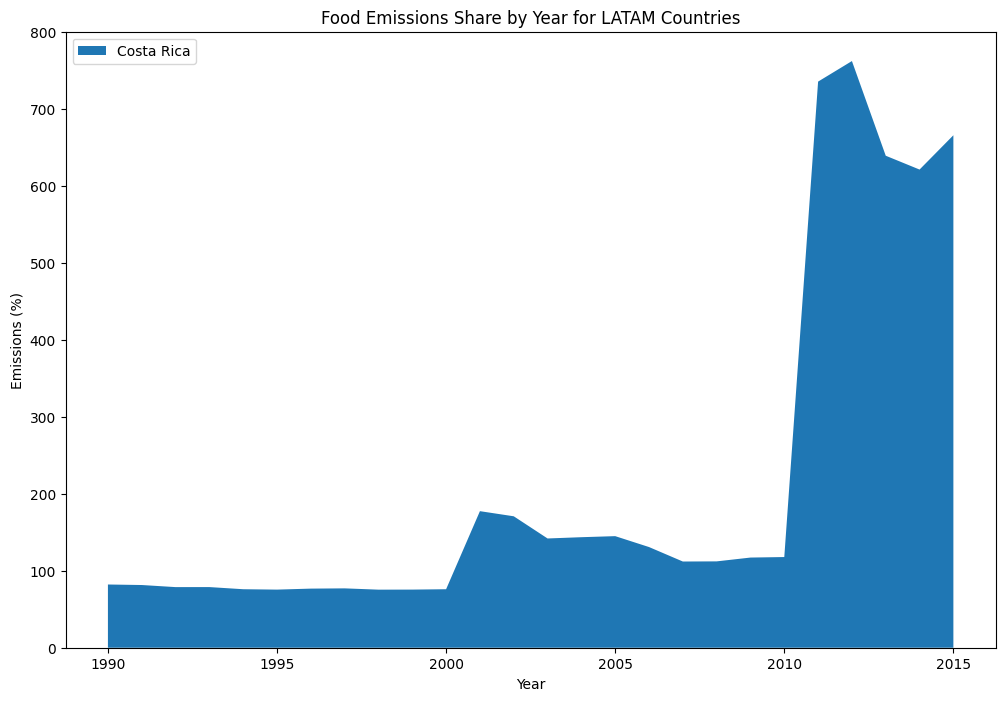

In [11]:
plot_stacked_area_chart(df_filtered, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', ['Costa Rica'])

##### En esta gráfica se puede observar mejor cómo disminuye la emisión en función del tiempo.

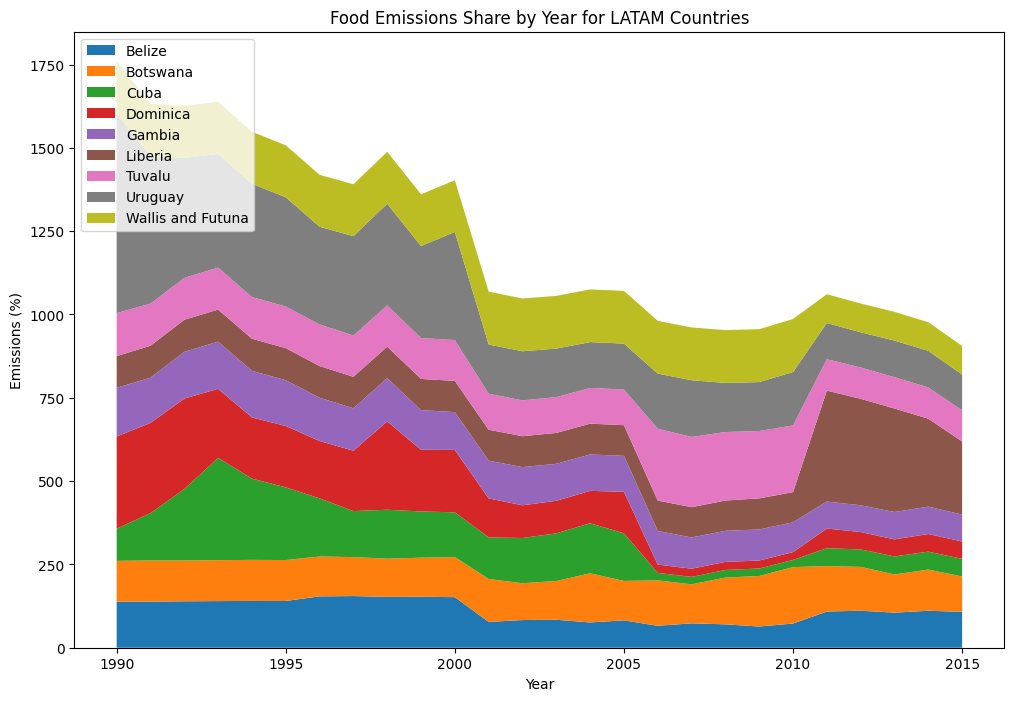

In [12]:
plot_stacked_area_chart(df_filtered, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', ['Uruguay', 'Wallis and Futuna', 'Tuvalu', 'Liberia', 'Dominica', 'Botswana', 'Cuba', 'Belize', 'Gambia'])

##### Con el top de empresas podemos ver que la emisión disminuye en gran medida pero... será esa la realidad general?

##### Para eso analizaremos los datos por continente

In [13]:
import matplotlib.pyplot as plt

def plot_emissions_by_year(df, countries, figsize=(10, 8)):
    # Filtrar el DataFrame para incluir solo los países específicos
    included_countries = df[df['Entity'].isin(countries)]

    # Agrupar por año y sumar las emisiones
    emissions_by_year = included_countries.groupby('Year')["Food's share of total emissions (incl. LULUFC)"].sum().reset_index()

    # Crear el histograma
    plt.figure(figsize=figsize)
    plt.bar(emissions_by_year['Year'], emissions_by_year["Food's share of total emissions (incl. LULUFC)"])

    plt.xlabel("Year")
    plt.ylabel("Total Emissions")
    plt.title("Total Food's Share of Emissions by Year for Specific Countries")
    plt.tight_layout()

    # Rotar las etiquetas del eje x si son demasiadas o si son largas para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()


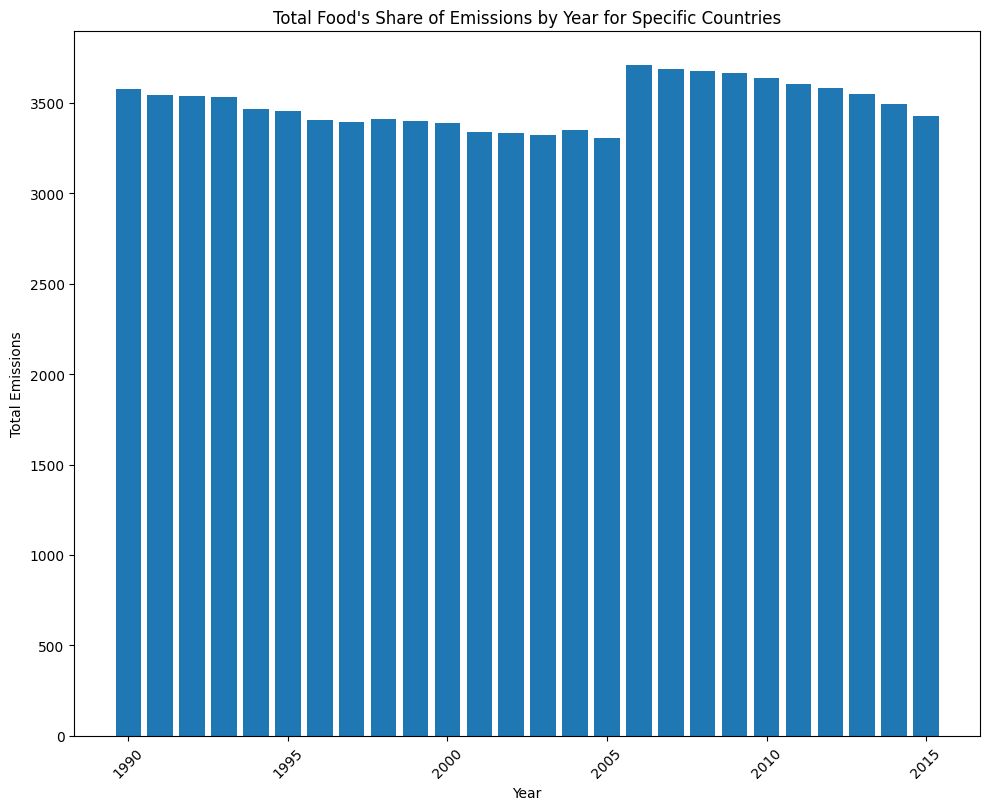

In [14]:
plot_emissions_by_year(df_filtered, AFRICA)

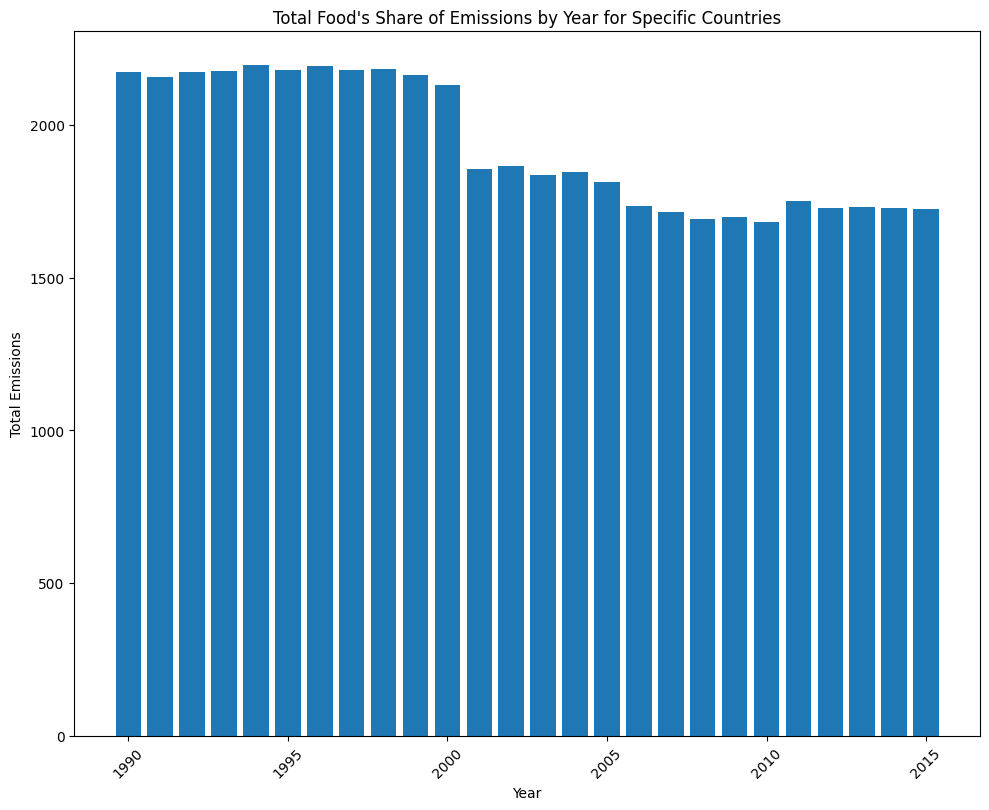

In [15]:
plot_emissions_by_year(df_filtered, ASIA)

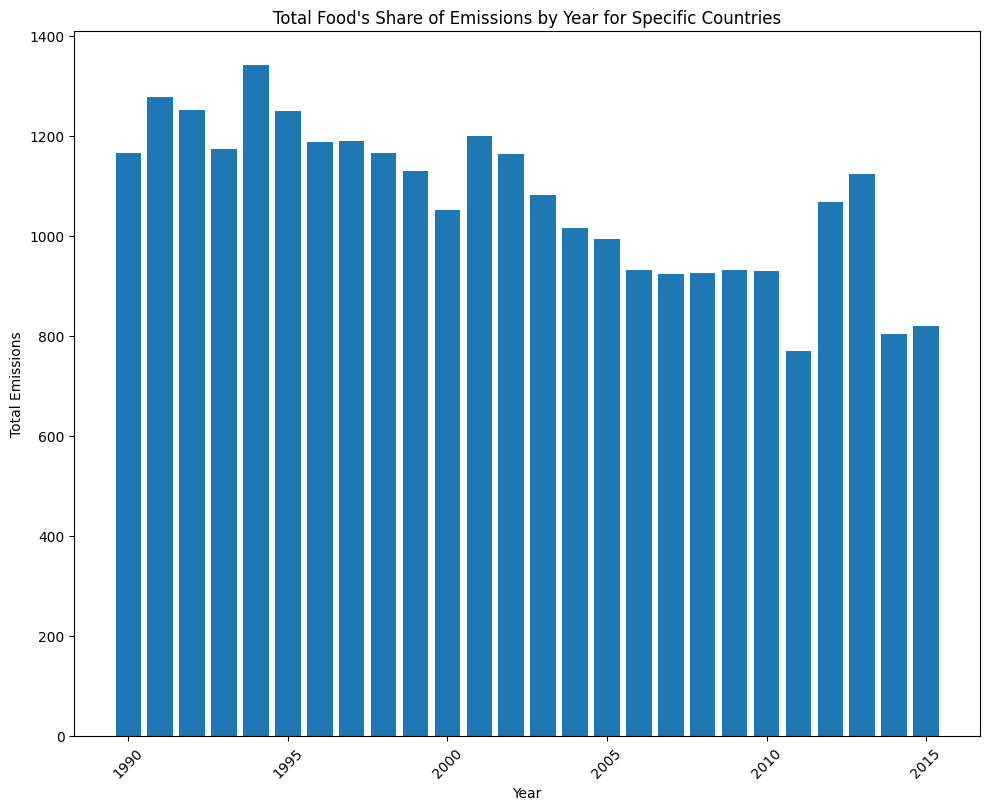

In [16]:
plot_emissions_by_year(df_filtered, OCEANIA)

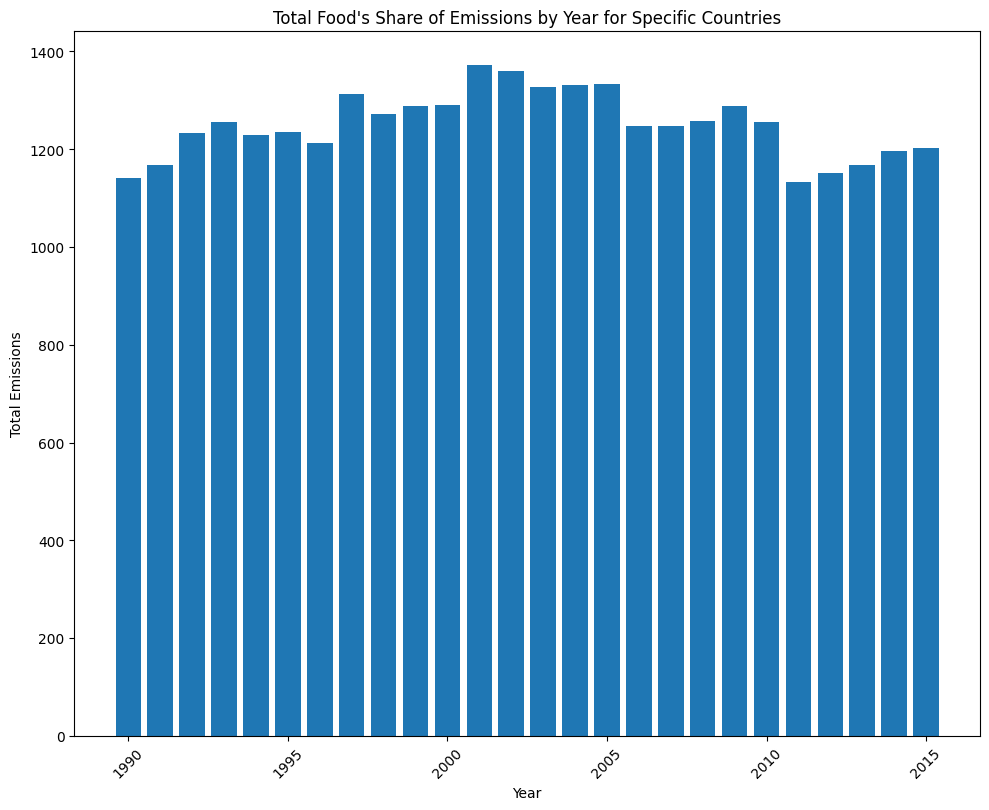

In [17]:
plot_emissions_by_year(df_filtered, EUROPE)

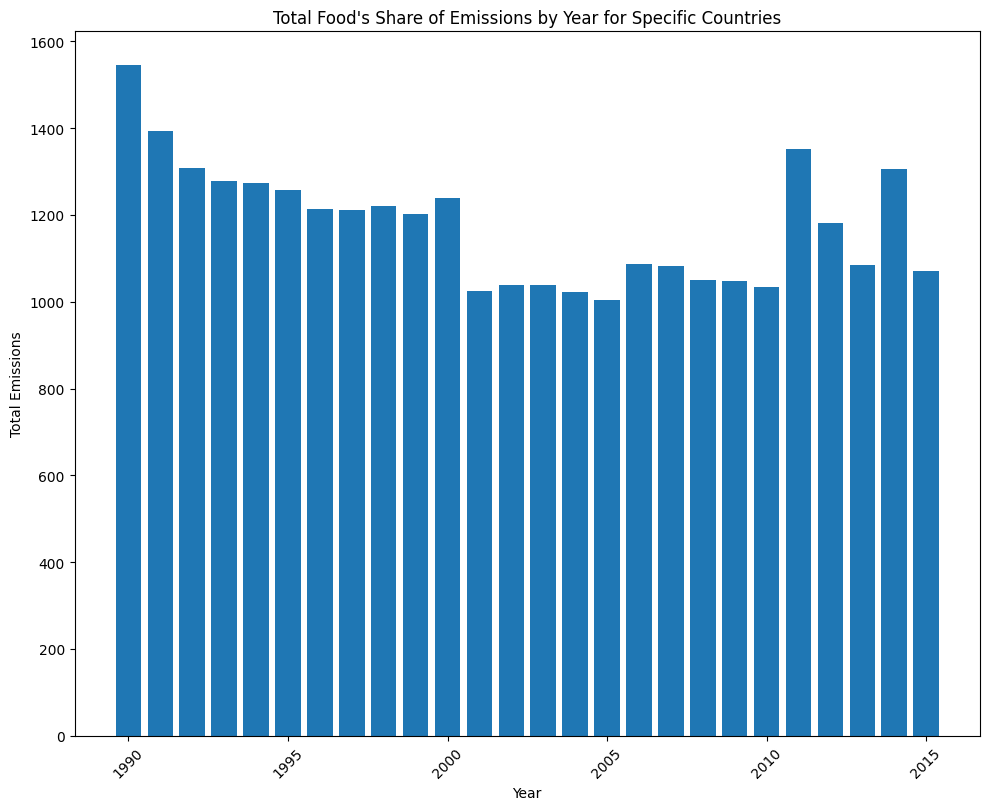

In [18]:
plot_emissions_by_year(df_filtered, SOUTH_AMERICA)

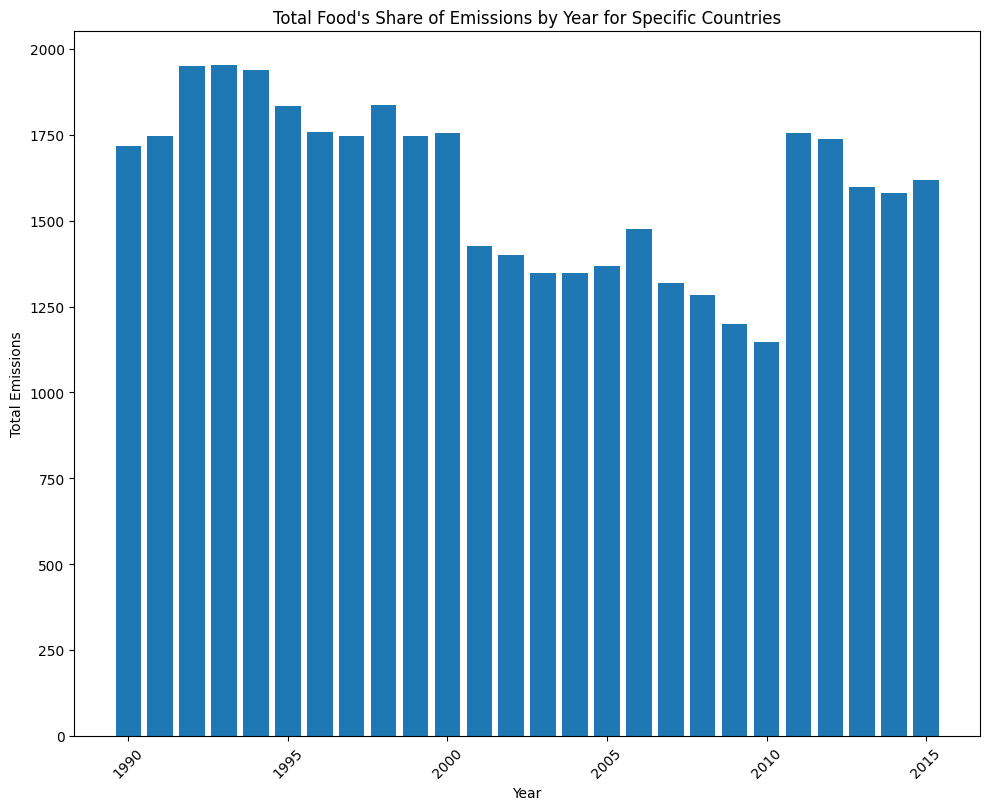

In [19]:
plot_emissions_by_year(df_filtered, NORTH_AMERICA)

#### Como podemos observar en el caso de Norte América, Sur América y Oceanía la disminución es observable mientras en el caso de Europa y Africa no hay disminución considerable. El continente con menos emisiones parece ser Europa, seguido de Sur América, Oseanía, Norte América, Asia y de último Africa siendo el mayor emisor.